In [3]:
import os
os.getcwd()

'/Users/jccan/projects/blog'

In [4]:
# Load outcome results
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd


df = pd.read_pickle('df_outcome_matrix_t25_k45.pkl')
ddf = pd.read_pickle('df_outcome_matrix_t25_k55.pkl')

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns
sns.set_style("dark") # background
sns.set_style("ticks") # ticks around

In [14]:
d= {u'corrupci\xf3n': 14,
 u'cultura': 10,
 u'econom\xeda': 8,
 u'educaci\xf3n': 2,
 u'empleo': 3,
 u'fuerzas armadas': 15,
 u'ideolog\xeda': 7,
 u'inseguridad ciudadana': 11,
 u'internacional': 9,
 u'justicia': 1,
 u'j\xf3venes': 6,
 u'medio ambiente': 4,
 u'salud': 5,
 u'servicios p\xfablicos e infraestructuras': 13,
 u'social': 12,
 u'tecnologia e investigaci\xf3n': 16,
 u'terrorismo': 17,
 u'vivienda': 0}

d_i={}
for k,v in d.iteritems():
    d_i[v] = k

In [8]:
dft25k45 = pd.DataFrame(columns=['numLabels', 'maxLabel', 'labelCode', 'labelName'])
for i in range(7000):
    dft25k45 .loc[i] = [len(df[i].unique()), max(df[i].value_counts()), 
                  df[i].value_counts().index[0], d_i[df[i].value_counts().index[0]]]

In [9]:
dft25k55 = pd.DataFrame(columns=['numLabels', 'maxLabel', 'labelCode', 'labelName'])
for i in range(7000):
    dft25k55 .loc[i] = [len(ddf[i].unique()), max(ddf[i].value_counts()), 
                  ddf[i].value_counts().index[0], d_i[ddf[i].value_counts().index[0]]]

In [10]:
s = abs(dft25k55['labelCode'] - dft25k45['labelCode'])
d = s>0

In [107]:
print len(s[s==0])*100/7000.
print (len(s) - len(s[s==0]))*100/7000.

92.7857142857
7.21428571429


In [108]:
d

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
...
6985    False
6986    False
6987    False
6988    False
6989    False
6990    False
6991    False
6992    False
6993     True
6994    False
6995    False
6996    False
6997    False
6998     True
6999    False
Name: labelCode, Length: 7000, dtype: bool

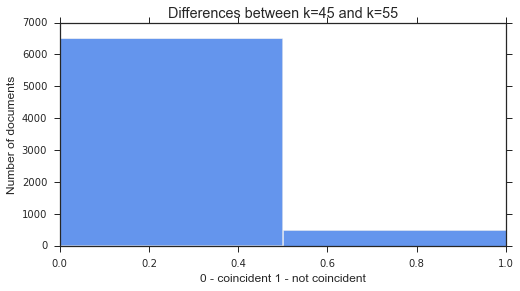

In [149]:
plt.ylabel('Number of documents')
plt.xlabel('0 - coincident 1 - not coincident')
plt.title('Differences between k=45 and k=55 ')
plt.hist(d, color="#6495ED", bins=2)
plt.savefig('./files/differences_between_models.png')

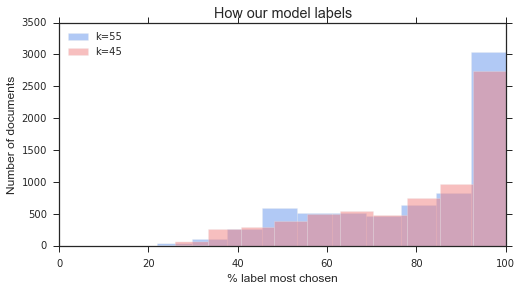

In [150]:
#dft25k55['maxLabel'].hist(color='r')
plt.ylabel('Number of documents')
plt.xlabel('% label most chosen')
plt.title('How our model labels')
plt.axis([0,100,0,3500])
hist1 = plt.hist(dft25k55['maxLabel'],  label='k=55', normed=False, color="#6495ED", alpha=.5)
hist2 = plt.hist(dft25k45['maxLabel'],  label='k=45', normed=False, color="#F08080", alpha=.5);
plt.legend(loc=2)
plt.show()
plt.savefig('./files/maxLabel.png')


In [151]:
print len(dft25k55[dft25k55['maxLabel']>=51])
print len(dft25k45[dft25k45['maxLabel']>=51])

6207
6274


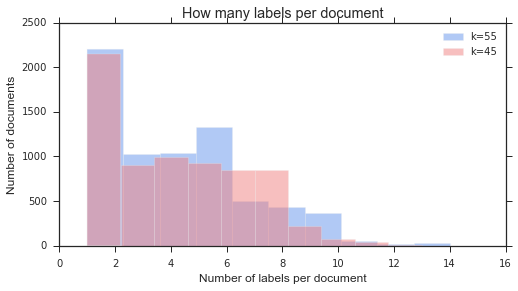

In [152]:
#dft25k55['numLabels'].hist(color='r')
#plt.hist(dft25k55['numLabels'])
plt.ylabel('Number of documents')
plt.xlabel('Number of labels per document')
plt.title('How many labels per document')
plt.axis([0,16,0,2500])
hist1 = plt.hist(dft25k55['numLabels'], label='k=55', normed=False, color="#6495ED", alpha=.5)
hist2 = plt.hist(dft25k45['numLabels'], label='k=45', normed=False, color="#F08080", alpha=.5)
plt.legend(loc=1)
plt.show()
plt.savefig('./files/numLabel.png')





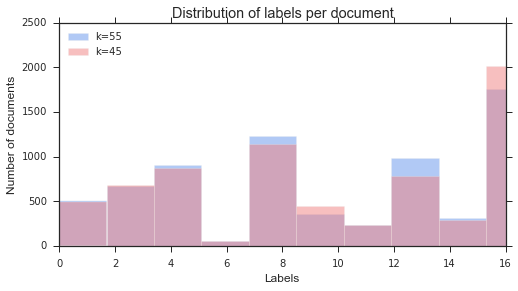

In [154]:
#dft25k55['labelCode'].hist(color='r',bins=17)
#dft25k45['labelCode'].hist(color='g',bins=17)
#plt.hist(dft25k55['labelCode'],  normed=False, color="#6495ED", alpha=.5)
#plt.hist(dft25k45['labelCode'], normed=False, color="#F08080", alpha=.5);
plt.ylabel('Number of documents')
plt.xlabel('Labels')
plt.title('Distribution of labels per document')
plt.axis([0,16,0,2500])
hist1 = plt.hist(dft25k55['labelCode'], label='k=55', normed=False, color="#6495ED", alpha=.5)
hist2 = plt.hist(dft25k45['labelCode'], label='k=45', normed=False, color="#F08080", alpha=.5)
plt.legend(loc=2)
plt.show()
plt.savefig('./files/labelCode.png')

In [12]:
# How close or far is our model from the 'majority' model?

df_our_model = pd.read_pickle('2015129_01320_df2pablo_tf_25_k_45.pkl')

In [15]:
df_our_model['labelCode'] = df_our_model['label'].apply(lambda x: d[x])

In [16]:
df_our_model

,date,label,keywords,labelCode
0,2000-09-13,internacional,"[asuntos exteriores, política exterior, derech...",9
1,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8
2,2000-09-13,medio ambiente,"[energías renovables, seguridad nuclear, energ...",4
3,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8
4,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8
5,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8
6,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8
7,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8
8,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8
9,2000-09-13,economía,"[empresas, empresas españolas, medianas empres...",8


In [24]:
s2 = abs(dft25k45['labelCode'] - df_our_model['labelCode'])
d2 = s2>0

In [23]:
print len(s2[s2==0])*100/7000.
print (len(s2) - len(s2[s2==0]))*100/7000.

65.1142857143
34.8857142857


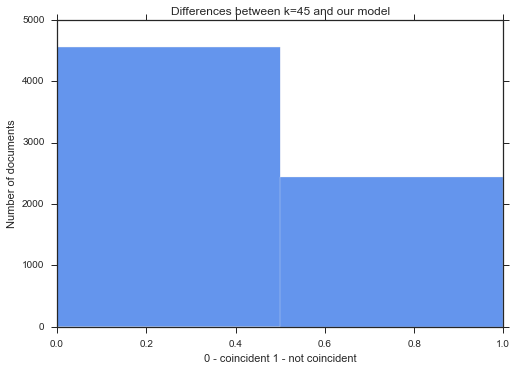

In [25]:
plt.ylabel('Number of documents')
plt.xlabel('0 - coincident 1 - not coincident')
plt.title('Differences between k=45 and our model ')
plt.hist(d2, color="#6495ED", bins=2)
plt.savefig('our_model_vs_mayority_model_k45.png')